In [4]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

<div dir='rtl'>
    از توابع زیر برای خواندن و ذخیره کردن تصاویر سیاه سفید استفاده می‌شود.
</div>

In [10]:
def read_gray_img(path):
    img = Image.open(path).convert('L')
    return np.array(img, dtype=np.uint8)

def save_gray_img(img, path):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.savefig(path, dpi=600)

<div dir='rtl'>
    تابع کانولوشن 2 بعدی را در زیر تکمیل کنید. پیاده سازی باید توسط خودتان انجام شده باشد و استفاده از توابع آماده مجاز نیست. برای سادگی میتوانید فرض کنید اندازه هسته (kernel) همیشه 3 در 3 است و تصویر ورودی سیاه سفید می‌باشد. همچنین به تصویر داده شده باید zero padding اضافه کنید تا تصویر خروجی اندازه برابر با تصویر ورودی پیدا کند. ورودی‌ها و خروجی تابع آرایه دو بعدی numpy هستند.
</div>

In [9]:
def convolution2d(image, kernel):
    kernel = kernel.transpose()
    convolved = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image = np.pad(image, pad_width=2)

    for i in range(convolved.shape[0]):
        for j in range(convolved.shape[1]):
            for m in range(3):
                for n in range(3):
                    convolved[i][j] += kernel[m][n] * image[i+m][j+n]

    return convolved


<div dir='rtl'>
    در سلول زیر تصویر مورد نظر بارگذاری شده و هسته‌های مختلف برای کانولوشن تعریف شده است.
</div>

In [11]:
image = read_gray_img('./gray.png')

kernel1 = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
], dtype=float)

kernel2 = 1/9 * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], dtype=float)

kernel3 = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
], dtype=float)

kernel4 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
], dtype=float)

kernel5 = 1/2 * np.array([
    [0, 0, 1],
    [0, 0, 0],
    [1, 0, 0]
], dtype=float)

<div dir='rtl'>
    با تکمیل تابع کانولوشن در بالا، کد زیر باید به درستی عمل کانولوشن را برای هر هسته انجام داده و تصاویر حاصل را در فایل‌های مختلف ذخیره کند.
</div>

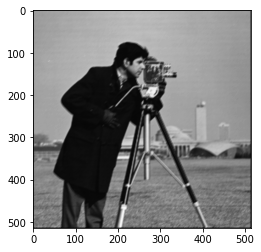

In [12]:
for i, kernel in enumerate([kernel1, kernel2, kernel3, kernel4, kernel5]):
    conv = convolution2d(image, kernel)
    save_gray_img(conv, str(i+1) + ".png")

<div dir='rtl'>
    سلول زیر نیز دو مرحله عمل کانولوشن را روی تصویر اصلی اعمال و ذخیره می‌کند.
</div>

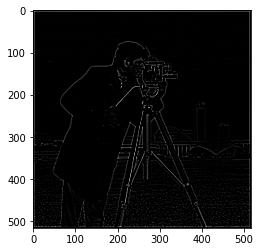

In [13]:
conv = convolution2d(image, kernel2)
conv = convolution2d(conv, kernel4)
save_gray_img(conv, "6.png")

<div dir='rtl'>
    در سلول پایین برای هر تصویر به دست آمده در مراحل بالا تشریح کنید که چه اتفاقی افتاده است و فیلترها (هسته‌ها)ی کانولوشن چه عملی روی تصویر انجام می‌دهند. پاسخ‌تان را توجیه کنید.
</div>

# کرنل ۱
به این کرنل
identity kernel

نیز گفته می‌شود. دلیل این امر این است که خروجی کانلولوشن دقیقا خود عکس با کمی پدینگ است و تغییری در عکس بوجود نمی‌آید.
دلیل این امر نیز واضح است تنها یک ۱ در ماتریس وجود دارد که بین پیکسل‌های تصویر نهایی و اولیه یک رابطه‌ی یک به یک برقرار می‌کند.

(به جز چند پیکسل اطراف که سیاه می‌شوند)

# کرنل ۲
جمع عناصر داخل ماتریس برابر یک است بنابراین به طور متوسط تغییری در روشنایی عکس بوجود نمی‌آید.
این کرنل در واقع برای هر پیکسل میانگین نه پیکسل دورش و خودش را قرار می‌دهد.
این امر باعث می‌شود تا جزییات عکس کمتر شود ولی واضح است که برای نواحی یکنواخت عکس تغییری ایجاد نمی‌شود.
(میانگین با خود مقدار تفاوتی ندارد)
بنابراین این کرنل عکس را کمی تار می‌کند.
به این کرنل

Simple box blur

نیز گفته می‌شود.

# کرنل ۳
باز هم جمع عناصر ماتریس برابر یک است پس به طور متوسط و در نواحی که یکنواختند روشنایی کل تغییری نمی‌کند.

این کرنل برای نواحی یکنواخت عکس تغییری ایجاد نمی‌کند. اما برای گوشه‌ها و نواحی که تغییر دارند تغییری ایجاد می‌کند.
فرض کنید یک تغییر روشنایی از سیاه به سفید داریم. اگر به آن نزدیک شویم یک خط مشاهده می‌کنیم که دو طرف آن به نواحی روشن و تیره تقسیم شده است.
در نواحی روشن نزدیک به خط ماتریس با بولد کردن خود روشنایی باعث روشن‌تر شدن آن می‌شود. و در نواحی تیره‌ی نزدیک خط ماتریس با بولد کردن خود پیکسل وسط باعث تیره‌تر شدن آن می‌شود.
بنابراین این ماتریس در مجموع لبه‌ها را بولد می‌کند و عکس شارپ می‌شود.

# کرنل ۴
جمع عناصر این ماتریس صفر است. بنابر این در نواحی یکنواخت ماتریس عکس را سیاه می‌کند.
تنها تغییرات است که می‌تواند از سیاه شدن فرار کند. از آنجایی که کانولوشن خطی است 

(و به طور خاص الگوریتمی که اینجا پیاده شده به طور واضحی خطی است)

این مااتریس را می‌توانیم جمع دو ماتریس کرنل ۳ با یک ماتریس منفی کرنل همانی در نظر گرفت.
یعنی ماتریس سه تصویر را شارپ می‌کند و نقاط روشن اطراف گوشه‌ها روشن‌تر می‌شوند. حال ماتریس بعدی نقاطی که تغییری نداشته‌اند را سیاه می‌کند. و به نوعی تنها گوشه‌ها باقی می‌مانند.

به این کرنل کرنل
Edge detection
نیز می‌گویند.

# کرنل ۵

این کرنل جمع عناصر برابر با یک دارد و بنابراین به روشنایی عکس به طور کلی کاری ندارد.

اما دقت کنید که یک خط عمودی را تار می‌کند زیرا نقاط تیره‌ی نزدیک لبه را روشن‌تر می‌کند و نقاط روشن را تیره‌تر بنابر این لبه‌ی عمودی را تار می‌کند.

این اتفاق برای لبه‌ی افقی نیز صادق است. اما دقت کنید که برای لبه‌ی ۴۵ درجه این که موازی قطر کرنل است هیچ اتفاقی نمی‌افتد.
و در عکس هم گوشه‌ی آستین دست راست مرد تار نشده است.
این تار شدگی از وقتی لبه از ۴۵ درجه‌ی موازی با قطر کرنل دور می‌شود شروع می‌شود و وقتی لبه عمود بر قطر کرنل می‌شود به بیشترین حالت خود می‌رسد.

(به تاری شدید پایه‌ی سمت راست دوربین که به ته بازه نزدیک است دقت کنید)

در واقع از لحاظ ریاضی این کرنل برابر با جمع دو کرنل همانی اما شیفت خورده است. یعنی در واقع این کرنل دو تصویر که به اندازه‌ی دو قطر پیکسل شیفت خورده‌اند را روی هم می‌اندازد و به نوعی عکس را در جهت ۴۵ درجه موازی قطر می‌کشد. حال واضح شد که چرا لبه‌های موازی قطر تار نمی‌شوند و لبه‌های عمود بیشترین تغییر را دارند. یعنی این شیفت خوردگی در جهت لبه تصویر می‌شود و هر لبه متناسب با سینوس زاویه‌ای که با قطر اصلی دارد تار می‌شود.

# ترکیب کرنل ۲ و ۴
همانطور که برای کرنل ۲ توضیح دادم این کرنل تغییری در روشنایی ایجاد نمی‌کند و تصویر را کم تار می‌کند.
به نوعی جزییات تصویر کم می‌شود.

(box blur)

حال کرنل ۴ اعمال می‌شود که

edge detector

است. و لبه‌ها را بولد می‌کند اما این بار لبه‌هایی که شدت کمتری داشتند

(کنتراست کمی داشتند)

محو شده اند.

در واقع این ترکیب به نوعی شدت

edge detection

را کم می‌کند و تنها لبه‌هایی که کنتراست زیادی داشتند باقی می‌ماند.

البته طبعا چون اعمال خطی هستند این تغییر صفر و یکی نیست و شدت نور لبه‌هایی که کنتراست کمی دارند کم می‌شود.
(همانطور که در تصویر نهایی در مقایسه با تصویر ۴ شدت نقاط اضافه‌ی روی چمن کم شده)